<a href="https://colab.research.google.com/github/nyangwono/assignments/blob/main/paperfolding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)
import torch
print(torch.__version__)

Python 3.11.12
2.18.0
3.8.0
2.6.0+cu124


In [2]:
# Install Python 3.7
!apt-get update -y
!apt-get install python3.7 python3.7-dev python3.7-venv -y

# Create a virtual environment
!python3.7 -m venv py37
!source py37/bin/activate

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,701 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,244 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/univer

In [3]:
!py37/bin/pip install tensorflow==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.3/109.3 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.5/488.5 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!py37/bin/pip install keras==2.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.2/336.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.1/670.1 kB 48.3 MB/s eta 0:00:00


In [5]:
!py37/bin/pip install torch==1.2.0 torchvision==0.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.2 MB/s eta 0:00:00


In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [7]:
!py37/bin/python -c "import sys; print(sys.version)"
!py37/bin/python -c "import tensorflow as tf; print(tf.__version__)"
!py37/bin/python -c "import keras; print(keras.__version__)"
!py37/bin/python -c "import torch; print(torch.__version__)"

3.7.17 (default, Jun  6 2023, 20:10:09) 
[GCC 11.3.0]
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/content/py37/lib/python3.7/site-packages/tensorflow/__init__.py", line 28, in <module>
    from tensorflow.python import pywrap_tensorflow  # pylint: disable=unused-import
  File "/content/py37/lib/python3.7/site-packages/tensorflow/python/__init__.py", line 52, in <module>
    from tensorflow.core.framework.graph_pb2 import *
  File "/content/py37/lib/python3.7/site-packages/tensorflow/core/framework/graph_pb2.py", line 16, in <module>
    from tensorflow.core.framework import node_def_pb2 as tensorflow_dot_core_dot_framework_dot_node__def__pb2
  File "/content/py37/lib/python3.7/site-packages/tensorflow/core/framework/node_def_pb2.py", line 16, in <module>
    from tensorflow.core.framework import attr_value_pb2 as tensorflow_dot_core_dot_framework_dot_attr__value__pb2
  File "/content/py37/lib/python3.7/site-packages/tensorflow/core/framework/attr_

In [8]:
# Initial thickness of the paper in meters
t0 = 0.00008

# Method 1: Using exponentiation operator
folded_thickness = t0 * (2 ** 43)

# Convert to kilometers and display with 2 decimal places
print("Thickness: {:.2f} kilometers".format(folded_thickness / 1000))

Thickness: 703687.44 kilometers


In [9]:
# Initial thickness in meters
t0 = 0.00008

# Calculate thickness after 43 folds using a for loop
folded_thickness = t0
for _ in range(43):
    folded_thickness *= 2

# Convert to kilometers and print with 2 decimal places
print("Thickness： {:.2f} kilometers".format(folded_thickness / 1000))


Thickness： 703687.44 kilometers


In [10]:
import time

# Initial thickness of the paper in meters
t0 = 0.00008

# --- Method 1: Using exponentiation operator ---
start = time.time()
#####
folded_thickness_exp = t0 * (2 ** 43)
#####
elapsed_time_exp = time.time() - start
print("Method 1 (exponentiation) - Thickness: {:.2f} kilometers".format(folded_thickness_exp / 1000))
print("Execution Time: {:.10f} seconds".format(elapsed_time_exp))

# --- Method 2: Using for loop ---
start = time.time()
#####
folded_thickness_loop = t0
for _ in range(43):
    folded_thickness_loop *= 2
#####
elapsed_time_loop = time.time() - start
print("Method 2 (for loop) - Thickness: {:.2f} kilometers".format(folded_thickness_loop / 1000))
print("Execution Time: {:.10f} seconds".format(elapsed_time_loop))


Method 1 (exponentiation) - Thickness: 703687.44 kilometers
Execution Time: 0.0000650883 seconds
Method 2 (for loop) - Thickness: 703687.44 kilometers
Execution Time: 0.0001351833 seconds


Number of values recorded: 44


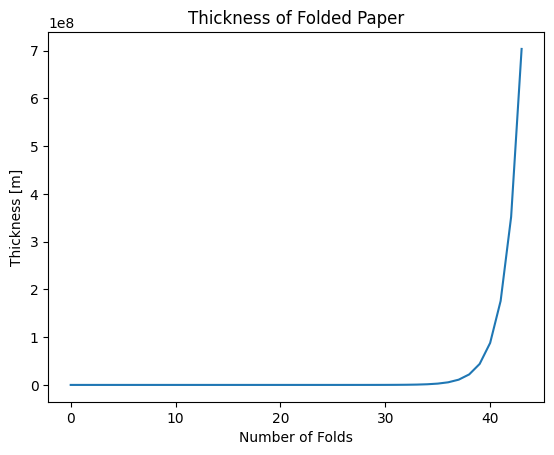

In [11]:
import matplotlib.pyplot as plt

# Initial thickness in meters
t0 = 0.00008

# Prepare an empty list to store thickness values
thickness_list = []

# Add the initial thickness before any fold
thickness_list.append(t0)

# Calculate thickness after each fold using a for loop
for _ in range(43):
    t0 *= 2
    thickness_list.append(t0)

# Verify the list contains 44 values (0 to 43 folds)
print("Number of values recorded:", len(thickness_list))  # Should print 44

# Basic graph display
plt.title("Thickness of Folded Paper")
plt.xlabel("Number of Folds")
plt.ylabel("Thickness [m]")
plt.plot(thickness_list)
plt.show()


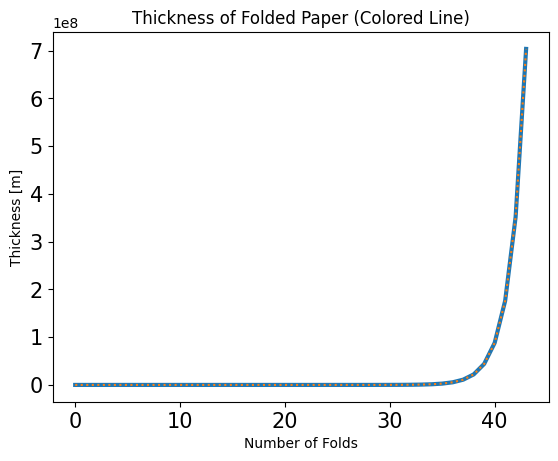

In [12]:
plt.title("Thickness of Folded Paper (Colored Line)")
plt.xlabel("Number of Folds")
plt.ylabel("Thickness [m]")
plt.plot(thickness_list, color='green')  # Change line color to green
plt.tick_params(labelsize=15)  # Make axis values larger
plt.plot(thickness_list, linewidth=3)  # Thicker line
plt.plot(thickness_list, linestyle='dotted')  # Dotted  line
plt.show()
